
<center>
<img src="https://i.imgur.com/iHiBmp6.jpg" align="center" alt="Imagem que mostra o título do projeto: O cenário da Tuberculose no Brasil">
</center>

## Informações Inicias sobre este Notebook


*   **Decisões de implementação**
    - Adicionamos nessa etapa mais datasets a título de entender mais sobre os dados. 
    - Optamos por não juntar datasets em um único arquivo CSV e isso devido a complexidade na qual ficariam. Mas nas análises via código fazemos análises em conjunto.
    - Este notebook se refere a etapa 2 do trabalho proposto, que tem como objetivo explorar os dados e responder as perguntas proposta [no readme do projeto](https://github.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425#perguntas-a-serem-respondidas-parte-1).
    - Além das perguntas bases, outras informações também puderam ser analisadas.
    - Ao final dos gráficos há um texto respondendo a pergunta base daquela seção.  
    - Utilizamos o Google Colab como ferramenta de elaboração.
    - A biblioteca matplotlib deverá ser a versão mais recente, então, se possui alguma inferior a 3.4, desinstale-a e instale novamente. Segue abaixo os comandos:
    ```
    pip uninstall matplotlib
    ```
    ```
    pip install matplotlib
    ``` 

* **Informações sobre os dados** 

  - A maioria dos conjuntos de dados tem dados de **2001 a 2020**, porém, contamos com algumas exceções, <strong>que ocorrem por inconsistência na base de dados do governo,</strong> são elas:

    - Casos Novos da PPL (População Privada de Liberdade): de 2005 a 2020
    - Casos Novos da PR (População de Rua): de 2006 a 2020
    - Casos Novos Drogarresistente: de 2005 a 2020
    - Casos Novos denImigrantes: de 2006 a 2020
    - Casos de Óbitos por TB: de 2007 a 2020
    - Pib per capita: de 2001 a 2012
    - População total da PPL: 2001 a 2019
    - Estimativa Populacional: 2001 a 2019


* **Principais Referências para esta epata**
  - [O que é Tuberculose - Gov.br](https://www.gov.br/saude/pt-br/assuntos/saude-de-a-a-z/t/tuberculose)
  - [DATASUS](http://tabnet.datasus.gov.br/)



#### Importação das bibliotecas

In [1]:
from google.colab import files
from pylab import rcParams

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import numpy as np
import matplotlib
import sklearn
import os

#### Funções auxiliares

In [2]:
def converte_coluna_de_anos_em_inteiro(dataframe):
  inicio = 2001
  final = 2020
  for ano in range(inicio, final + 1):
    if {str(ano)}.issubset(dataframe.columns):
      dataframe[str(ano)] = dataframe[str(ano)].astype(int)

In [3]:
def media_dos_anos_por_estado(df,estados,anos):
  media = []
  for sigla in estados:
    media.append(df[df['Sigla'] == sigla][anos].values.mean())

  return media

In [4]:
def plota_grafico_destacando_maior_e_menor_valor(dataframe, titulo, eixo_x, eixo_y, label_x, label_y, largura, altura, orientacao, minimo_parametro, escala, sobra):
  rcParams['figure.figsize'] = largura, altura

  cores = []

  maximo = max(dataframe[eixo_y])
  minimo = min(dataframe[eixo_y])

  for anos in dataframe[eixo_y]:
    if (anos == maximo):
      cores.append('#C70039')
    elif (anos == minimo):
      cores.append('#FFBD39')
    else:
      cores.append('#11144C')

  cores_da_legenda = {
    'Maior Taxa':   '#C70039',
    'Menor Taxa':   '#FFBD39',
  }

  labels=["Maior Taxa","Menor Taxa"]

  if orientacao == 'v':
    ax = sns.barplot(x=eixo_x, y=eixo_y, data=dataframe, palette=cores, orient=orientacao)
  if orientacao == 'h':
    ax = sns.barplot(y=eixo_x, x=eixo_y, data=dataframe, palette=cores, orient=orientacao)

  ax.set_title(titulo, fontsize=15)

  patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in cores_da_legenda.items()]
  plt.legend(handles=patches, fontsize=12)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  ax.set_xlabel(label_x, size = 12 ) 
  ax.set_ylabel(label_y , size = 12 ) 
  ax.set(yticks=[i for i in range(minimo + escala, max(dataframe[eixo_y]) + escala, escala)])
  ax.set(ylim=(minimo_parametro , maximo + sobra))


  labels = ax.bar_label(ax.containers[0], padding=4, fontsize=12)
  plt.show()

def grafico_comparativo(x,y1,y2,y1label,y2label,title,xlabel,ylabel,log=False):
  plt.figure(figsize=(10, 8))
  plt.plot(x,y1, c="green", ls="-", lw = 1, marker="o", label=y1label)
  plt.plot(x,y2, c="orange", ls="-",  lw = 1, marker="o", label=y2label)
  plt.title(title,fontsize=14)
  plt.xlabel(xlabel,fontsize=14)
  plt.ylabel(ylabel,fontsize=14)
  plt.legend(fontsize=13)
  if(log):
    plt.yscale('log')
  plt.show()

#### Leitura dos datasets tratados


###### Incidência de tuberculose ao longo dos anos

In [5]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/casos_tuberculose.csv?token=AJ675MVP2XC2THWN4GHXSSTBNNG4U"
casos_tuberculose = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")

###### Quanto mais pessoas receberem a vacina, maior será a cobertura vacinal

In [6]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/cobertura_vacinal_tuberculose.csv?token=AJ675MWE5Y5DHSXA2HL4G4DBNNHEI"
cobertura_vacinal = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")

###### Quantidade de pessoas imunizadas

In [7]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/imunizacao_tuberculose.csv?token=AJ675MRNIZQSXYYY6Z5PKFTBNNHMW"
imunizacao_tuberculose = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")

###### Quantidade de óbitos por tuberculose

In [8]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/obitos_tuberculose.csv?token=AJ675MVSAH3Z42YC5QFFAL3BNNHSW"
obitos_tuberculose = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")

###### Incidência de AIDS ao longo dos anos

In [9]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/casos_aids.csv?token=AJ675MTJPZ2K4VWFBX7765LBNNJRG"
casos_aids = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")

###### Estimativa populacional

In [10]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/estimativa_populacional.csv?token=AJ675MWVOCTMWK3TAHM5P6TBNNJZA"
estimativa_populacional = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")

###### Percentual de vacinação per capta

In [11]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/percentual_imunizacao.csv?token=AJ675MR3D2OOQCECFQSQT2TBNNKCS"
percentual_imunizacao = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")

###### PIB per capta

In [12]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/pib_percapta.csv?token=AJ675MUVKRJMEBPN7SRNI3LBNNKMW"
pib_percapta = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")

###### População privada de liberdade

In [13]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/populacao_privada_de_liberdade.csv?token=AJ675MQ5MM3U5GQBLRCLFJTBNNKWM"
populacao_priv_lib = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")

In [14]:
ppl = {'Anos': ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], 
       'Total': [361402, 401236, 422590, 451429, 473626, 496251, 514582, 548003, 581507, 622202, 698618, 722120, 726354, 744216, 755274]}  
  
# Create DataFrame  
ppl = pd.DataFrame(ppl)  
  
# Print the output.  
print(ppl)  

    Anos   Total
0   2005  361402
1   2006  401236
2   2007  422590
3   2008  451429
4   2009  473626
5   2010  496251
6   2011  514582
7   2012  548003
8   2013  581507
9   2014  622202
10  2015  698618
11  2016  722120
12  2017  726354
13  2018  744216
14  2019  755274


###### Casos novos confirmados por laborátorio 

In [15]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/casos_novos_conflabo.csv?token=AJ675MWQHHVIXR735MKRRLDBNNLIU"
casosnovos_confir_labo = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")
casosnovos_confir_labo = casosnovos_confir_labo[:-1]

###### Casos novos abandono

In [16]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/casos_novos_abandono.csv?token=AL5PFFIWLRQWVWNGC24IDIDBNRAJO"
casos_novos_abandono = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")

###### Casos novos dorgaresistente

In [17]:
url_raw ="https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/casos_novos_dr.csv?token=AL5PFFJP6TKTYHDG35DKENLBNRAHY"
casos_novos_dr = pd.read_csv(url_raw, encoding="latin1", delimiter=";")

###### Casos novos curados

In [18]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/casos_novos_cura.csv?token=AL5PFFLK2HPN45QQR4AQMK3BNRAFY"
casos_novos_cura = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")

###### Casos novos

In [19]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/casos_novos.csv?token=AJ675MX6JLUWNHKEG2HXZ7LBNNLOW"
casos_novos = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")

###### Casos novos 2020

In [20]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/casos_novos_2020.csv?token=AJ675MX7HMQJ5RVTFQRBF23BNNLWG"
casos_novos_2020 = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")

###### Casos novos 2019

In [21]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/casos_novos_2019.csv?token=AJ675MRDG5SNSJSBDDZZ77DBNNLZO"
casos_novos_2019 = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")

##### Casos População Vulnerável

###### Casos novos em População de Rua 


In [22]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/casos_novos_PR.csv?token=AJ675MXJFADU3NECLBKNLWTBNNMGU"
casos_novos_pr = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")
casos_novos_pr.replace('-', '0', inplace=True)

###### Casos novos de Profissionais de Saúde

In [23]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/casos_novos_PS.csv?token=AJ675MXMC3RP3XLNOG5W2FDBNNMO6"
casos_novos_prof_saude = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")
casos_novos_prof_saude.replace('-', '0', inplace=True)

###### Casos novos de Imigrantes

In [24]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/casos_novos_imi.csv?token=AJ675MSQ5VYRXOPSZMN5SE3BNNMXK"
casos_novos_imi = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")
casos_novos_imi.replace('-', '0', inplace=True)

###### Casos novos PPL

In [25]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/casos_novos_PPL.csv?token=AL5PFFLSXCRFMRRCJVVOEMDBNRTTO"
casos_novos_ppl = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")
casos_novos_ppl.replace('-', '0', inplace=True)

###### Junção dos datasets de população de rua, prof de saúde, imigrantes e população privada de liberdade

In [26]:
converte_coluna_de_anos_em_inteiro(casos_novos_prof_saude)
converte_coluna_de_anos_em_inteiro(casos_novos_ppl)
converte_coluna_de_anos_em_inteiro(casos_novos_pr)
converte_coluna_de_anos_em_inteiro(casos_novos_imi)

In [27]:
ano_inicial = 2016
ano_final = 2020

nome_anos = []
soma_anos = []

for i in range(5):
  nome_anos.append(str(ano_inicial + i))
  soma_anos.append(casos_novos_ppl[str(ano_inicial + i)].sum())

casos_novos_ppl_periodo_j = pd.DataFrame(list(zip(nome_anos, soma_anos)), columns=['Anos', 'População Privada de Liberdade'])

In [28]:
ano_inicial = 2016
ano_final = 2020

nome_anos = []
soma_anos = []


for i in range(5):
  nome_anos.append(str(ano_inicial + i))
  soma_anos.append(casos_novos_prof_saude[str(ano_inicial + i)].sum())

casos_novos_prof_saude_periodo = pd.DataFrame(list(zip(nome_anos, soma_anos)), columns=['Anos', 'Profissionais de Saúde'])

In [29]:
ano_inicial = 2016
ano_final = 2020

nome_anos = []
soma_anos = []

for i in range(5):
  nome_anos.append(str(ano_inicial + i))
  soma_anos.append(casos_novos_pr[str(ano_inicial + i)].sum())

casos_novos_pr_periodo = pd.DataFrame(list(zip(nome_anos, soma_anos)), columns=['Anos', 'População de Rua'])

In [30]:
ano_inicial = 2016
ano_final = 2020

nome_anos = []
soma_anos = []

for i in range(5):
  nome_anos.append(str(ano_inicial + i))
  soma_anos.append(casos_novos_imi[str(ano_inicial + i)].sum())

casos_novos_imi_periodo = pd.DataFrame(list(zip(nome_anos, soma_anos)), columns=['Anos', 'Imigrantes'])

In [31]:
casos_novos_polvul = pd.concat([casos_novos_ppl_periodo_j.set_index('Anos'), casos_novos_prof_saude_periodo.set_index('Anos'), casos_novos_pr_periodo.set_index('Anos'), casos_novos_imi_periodo.set_index('Anos')], axis=1)

##### Casos novos por raça

###### Branca

In [32]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/casos_novos_branco.csv?token=AJ675MRZAYAEDS5UPMAR3A3BNNM4W"
casos_novos_raca_branca = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")

###### Parda

In [33]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/casos_novos_parda.csv?token=AJ675MXUBK7D3HO5LD2EV6TBNNNA2"
casos_novos_raca_parda = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")
casos_novos_raca_parda.replace('-', '0', inplace=True)

###### Preta

In [34]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/casos_novos_preta.csv?token=AJ675MUYLEZOC36HRZL6UR3BNNNFM"
casos_novos_raca_preta = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")
casos_novos_raca_preta.replace('-', '0', inplace=True)
casos_novos_raca_preta = casos_novos_raca_preta[:-1]

###### Indi

In [35]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/casos_novos_indi.csv?token=AJ675MX42UIWSPSIEUV3LYDBNNNOM"
casos_novos_raca_indi = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")
casos_novos_raca_indi.replace('-', '0', inplace=True)

###### Amarela

In [36]:
url_raw = "https://raw.githubusercontent.com/NadiaaOliverr/O-Brasil-em-Dados-CCF-425/main/Dados/Tratados/casos_novos_ama.csv?token=AJ675MTSZKOAXYWIV4LVGF3BNNNTK"
casos_novos_raca_amarela = pd.read_csv(url_raw, encoding="utf-8", delimiter=";")
casos_novos_raca_amarela.replace('-', '0', inplace=True)

###### Junção dos datasets de raça parda e preta e dos datasets raça indigena e amarala

In [37]:
ano_inicial = 2016
ano_final = 2020

nome_anos = []
soma_anos = []

for i in range(5):
  nome_anos.append(str(ano_inicial + i))
  soma_anos.append(casos_novos_raca_parda[str(ano_inicial + i)].sum())

casos_novos_raca_parda_periodo = pd.DataFrame(list(zip(nome_anos, soma_anos)), columns=['Anos', 'Preta/parda'])

In [38]:
ano_inicial = 2016
ano_final = 2020

nome_anos = []
soma_anos = []


for i in range(5):
  nome_anos.append(str(ano_inicial + i))
  soma_anos.append(casos_novos_raca_preta[str(ano_inicial + i)].sum())

casos_novos_raca_preta_periodo = pd.DataFrame(list(zip(nome_anos, soma_anos)), columns=['Anos', 'Preta/parda'])

In [39]:
converte_coluna_de_anos_em_inteiro(casos_novos_raca_amarela)
converte_coluna_de_anos_em_inteiro(casos_novos_raca_indi)

In [40]:
casos_novos_raca_parda_preta = casos_novos_raca_parda_periodo.set_index('Anos').add(casos_novos_raca_preta_periodo.set_index('Anos'))

In [41]:
ano_inicial = 2016
ano_final = 2020

nome_anos = []
soma_anos = []

for i in range(5):
  nome_anos.append(str(ano_inicial + i))
  soma_anos.append(casos_novos_raca_amarela[str(ano_inicial + i)].sum())

casos_novos_raca_amarela_periodo = pd.DataFrame(list(zip(nome_anos, soma_anos)), columns=['Anos', 'Amarela/indígena'])

In [42]:
ano_inicial = 2016
ano_final = 2020

nome_anos = []
soma_anos = []

for i in range(5):
  nome_anos.append(str(ano_inicial + i))
  soma_anos.append(casos_novos_raca_indi[str(ano_inicial + i)].sum())

casos_novos_raca_indi_periodo = pd.DataFrame(list(zip(nome_anos, soma_anos)), columns=['Anos', 'Amarela/indígena'])

In [43]:
casos_novos_raca_indi_ama = casos_novos_raca_indi_periodo.set_index('Anos').add(casos_novos_raca_amarela_periodo.set_index('Anos'))

In [44]:
ano_inicial = 2016
ano_final = 2020

nome_anos = []
soma_anos = []

for i in range(5):
  nome_anos.append(str(ano_inicial + i))
  soma_anos.append(casos_novos_raca_indi[str(ano_inicial + i)].sum())

casos_novos_raca_branca = pd.DataFrame(list(zip(nome_anos, soma_anos)), columns=['Anos', 'Branca'])

In [45]:
casos_novos_racas = pd.concat([casos_novos_raca_parda_preta, casos_novos_raca_indi_ama, casos_novos_raca_branca.set_index('Anos')], axis=1)

#### Análise exploratória e extração de conhecimento
###### **Essa seção Tem como objetivo responder as perguntas propostas na fase I do projeto.**

##### **Pergunta 1 e 3**

###### 1. Qual período teve a maior taxa de cobertura vacinal de Tuberculose? 

###### 3. E qual período teve a menor taxa de cobertura vacinal de Tuberculose?

In [46]:
ano_inicial = 2001
ano_final = 2020

nome_anos = []
soma_anos = []

for i in range(20):
  nome_anos.append(str(ano_inicial + i))
  soma_anos.append(cobertura_vacinal[str(ano_inicial + i)].sum())

cobertura_vacinal_periodo = pd.DataFrame(list(zip(nome_anos, soma_anos)), columns=['Anos', 'Total'])

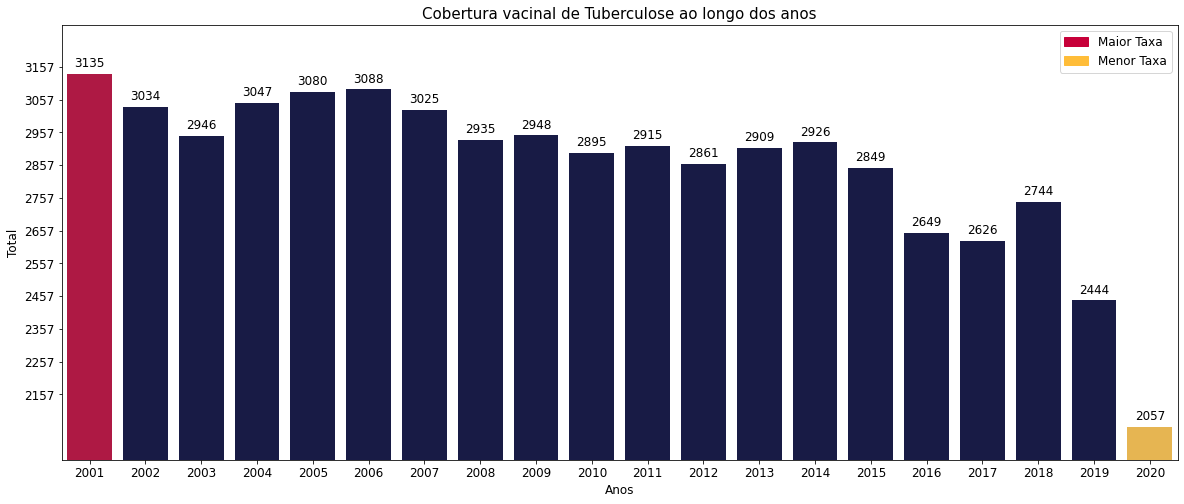

In [47]:
plota_grafico_destacando_maior_e_menor_valor(cobertura_vacinal_periodo, 'Cobertura vacinal de Tuberculose ao longo dos anos', 'Anos', 'Total', 'Anos', 'Total', 20, 8, 'v', cobertura_vacinal_periodo['Total'].min() - 100, 100, 150 )

O período que teve maior cobertura vacinal foi no ano 2001, e o com menor taxa de cobertura vacinal foi no ano de 2020. Por conta da COVID-19 a prioridade foi conseguir uma vacina para tal vírus, como também com o isolamento social e as regras impostas para as pessoas ficarem em casa, poucas pessoas iam se vacinar contra a tuberculose.

##### **Pergunta 2 e 4**


###### 2. Quais os estados que mais vacinaram durante os últimos anos?

###### 4. E os que menos vacinaram durante os últimos anos?

In [48]:
X = cobertura_vacinal['Sigla']
Y = cobertura_vacinal[' Total']

cobertura_vacinal_estado = pd.DataFrame(list(zip(X, Y)), columns=['Sigla', 'Total'])
cobertura_vacinal_estado.sort_values(by='Total', ascending=False, inplace=True)
cobertura_vacinal_estado.reset_index(drop=True, inplace=True)

###### TOP 5 Estados que **mais** vacinaram durante os últimos anos

In [49]:
cobertura_vacinal_estado[:5]

,Sigla,Total
0,MA,113.83
1,AP,113.18
2,PA,111.64
3,AM,110.37
4,PB,108.69


###### TOP 5 Estados que **menos** vacinaram durante os últimos anos

In [50]:
cobertura_vacinal_estado[22:]

,Sigla,Total
22,SE,98.94
23,PI,98.76
24,MG,98.42
25,SC,97.87
26,RS,97.69


Dos anos de 2001 a 2020, os estados que mais vacinaram contra a tuberculose foram: Maranhão, Amapá, Pará, Amazonas e Paraíba. Enquanto os que menos vacinaram foram Sergipe, Piauí, Minas Gerais, Santa Catarina e Rio Grande do Sul.

##### **Pergunta 5 e 7**

5. Qual a taxa de incidência de Tuberculose por ano?

7. Com base nas analises, a taxa de incidência de Tuberculose no país aumentou ou diminiu?

Primeiramente, vamos olhar para todos os casos de tuberculose, ou seja que o tipo de entrada que foi coletado pelo orgão público tem as seguintes definições: caso novo, recidiva, reingresso após abandono, não sabe, transferência, pós óbito. 

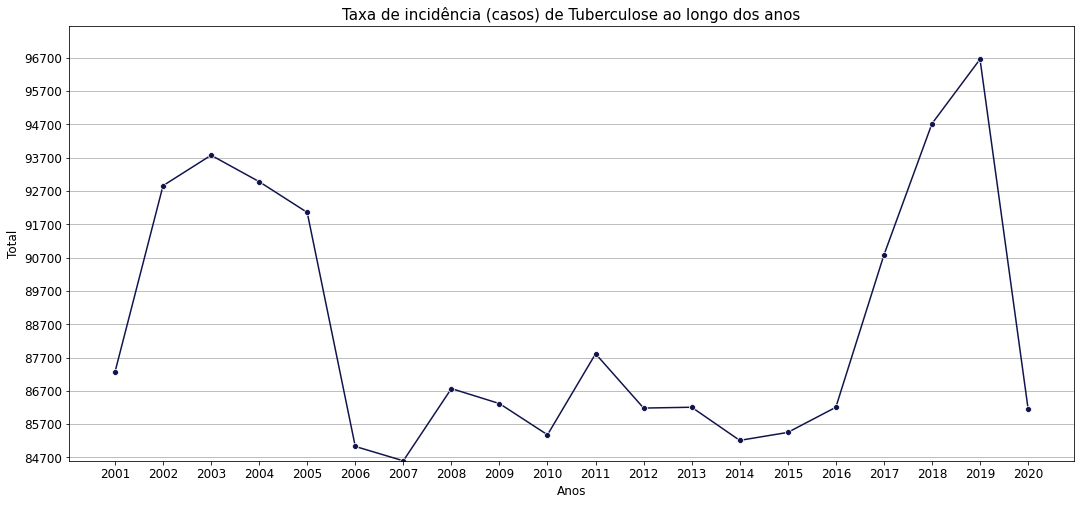

In [51]:
casos_tuberculose_periodo = casos_tuberculose.loc[27:, '2001': '2020'].T.reset_index().rename(columns={'index': 'Anos', 27: 'Total'})
maximo = casos_tuberculose_periodo['Total'].max()
minimo = casos_tuberculose_periodo['Total'].min()

fig, ax = plt.subplots(figsize=(18, 8))
sns.lineplot(data=casos_tuberculose_periodo, x='Anos', y='Total', color='#11144C', marker='o', ax=ax)

ax.set_title('Taxa de incidência (casos) de Tuberculose ao longo dos anos', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel( "Anos" , size = 12 ) 
ax.set_ylabel( "Total" , size = 12 ) 
ax.set(yticks=[i for i in range(minimo + 100, max(casos_tuberculose_periodo['Total']) + 1000, 1000)])
ax.set(ylim=(minimo, maximo + 1000))

ax.yaxis.grid(True)

plt.show()

E vamos agora comparar com um gráfico somente de casos novos.

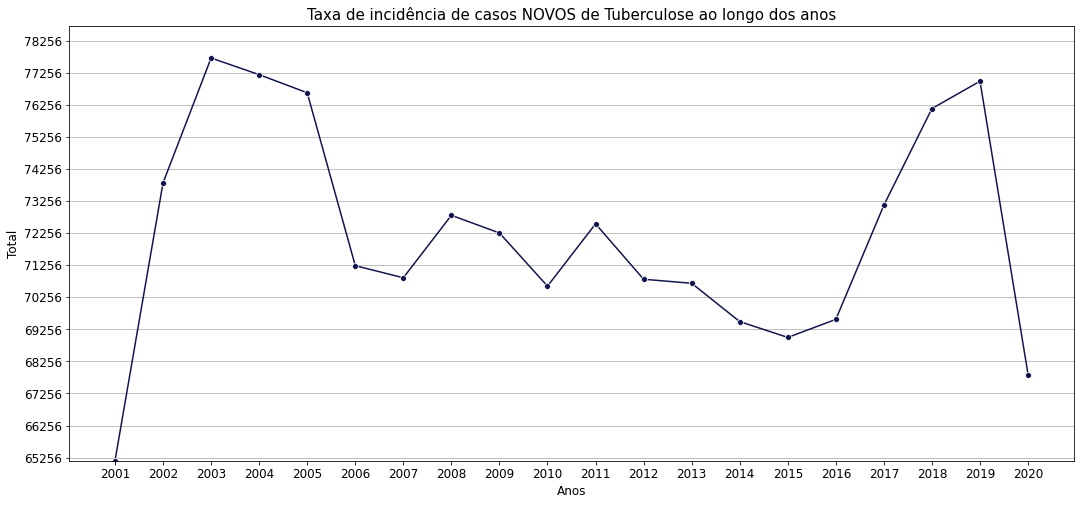

In [52]:
casos_novos_periodo = casos_novos.loc[27:, '2001': '2020'].T.reset_index().rename(columns={'index': 'Anos', 27: 'Total'})
maximo = casos_novos_periodo['Total'].max()
minimo = casos_novos_periodo['Total'].min()

fig, ax = plt.subplots(figsize=(18, 8))
sns.lineplot(data=casos_novos_periodo, x='Anos', y='Total', color='#11144C', marker='o', ax=ax)

ax.set_title('Taxa de incidência de casos NOVOS de Tuberculose ao longo dos anos', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel( "Anos" , size = 12 ) 
ax.set_ylabel( "Total" , size = 12 ) 
ax.set(yticks=[i for i in range(minimo + 100, max(casos_novos_periodo['Total']) + 1000, 1000)])
ax.set(ylim=(minimo, maximo + 1000))

ax.yaxis.grid(True)

plt.show()

###### Abaixo as taxas de incidências para cada ano em ordem decrescente

In [53]:
casos_tuberculose_periodo = casos_tuberculose.loc[27:, '2001': '2020'].T.reset_index().rename(columns={'index': 'Ano', 27: 'Total'})
casos_tuberculose_periodo.sort_values(by='Total', ascending=False, inplace=True)
casos_tuberculose_periodo.reset_index(drop=True)

,Ano,Total
0,2019,96655
1,2018,94720
2,2003,93773
3,2004,92980
4,2002,92859
5,2005,92056
6,2017,90776
7,2011,87813
8,2001,87265
9,2008,86768


In [54]:
casos_novos_periodo = casos_novos.loc[27:, '2001': '2020'].T.reset_index().rename(columns={'index': 'Ano', 27: 'Total'})
casos_novos_periodo.sort_values(by='Total', ascending=False, inplace=True)
casos_novos_periodo.reset_index(drop=True)

,Ano,Total
0,2003,77712
1,2004,77193
2,2019,76988
3,2005,76629
4,2018,76137
5,2002,73820
6,2017,73125
7,2008,72808
8,2011,72542
9,2009,72258


Através das análises é possível perceber que de 2007 a 2016 houve uma baixa significativa dos números de casos. Porém, ao longo dos últimos 4 anos essa taxa teve aumento significativo, sendo 2019 o ano de maior número de casos da doença.

Os casos novos da doença, tirando então pessoas que tiveram reingresso após abandono, transferência e pós óbito, foram bem baixo nos últimos anos com exceção de 2019.

##### **Pergunta 6**


###### 6. Qual estado teve o maior percentual de vacinação per capta? (Vacina BCG)

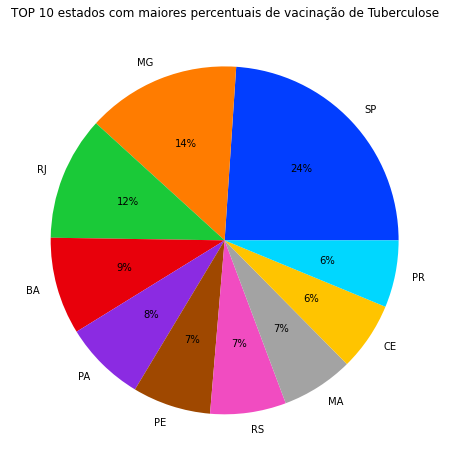

In [55]:
data = percentual_imunizacao[' Total']
labels = percentual_imunizacao['Sigla']
top_10_percent_estados = pd.DataFrame(list(zip(labels, data)), columns=['Sigla', 'Total'])
top_10_percent_estados.sort_values(by='Total', inplace=True, ascending=False)
top_10_percent_estados = top_10_percent_estados[:10].reset_index(drop=True)

colors = sns.color_palette('bright')[0:10]

plt.pie(x = top_10_percent_estados['Total'], labels = top_10_percent_estados['Sigla'], colors = colors, autopct='%.0f%%')
plt.title('TOP 10 estados com maiores percentuais de vacinação de Tuberculose')
plt.show()

O estado que teve maior percentual de vacinação ao longo dos anos de 2001 a 2020 é São Paulo, seguido de Minas Gerais e Rio de Janeiro.

##### **Pergunta 8**


###### 8. Durante o começo da pandemia em 2020, o número de casos diminiu significamente?


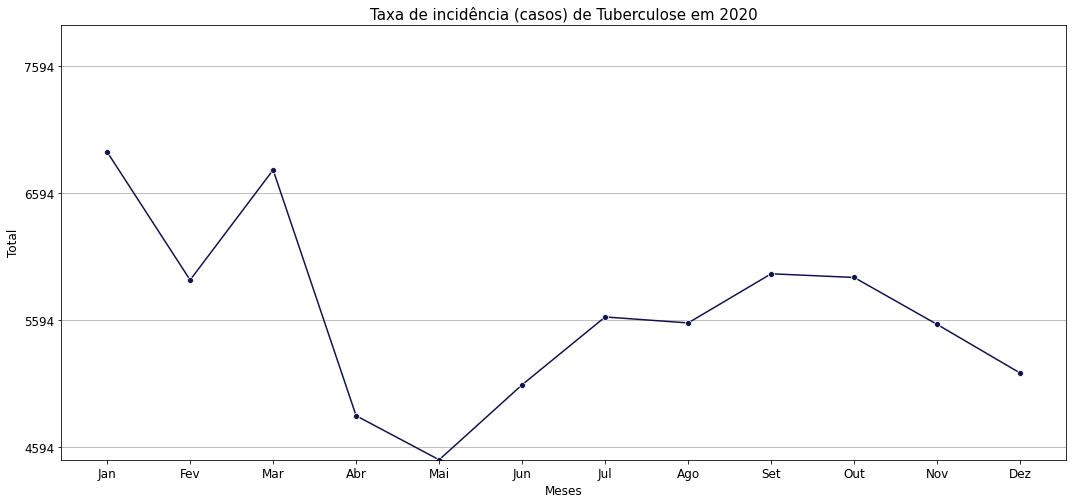

In [56]:
casos_novos_2020_meses = casos_novos_2020.loc[27:, 'Jan': 'Dez'].T.reset_index().rename(columns={'index': 'Meses', 27: 'Total'})
maximo = casos_novos_2020_meses['Total'].max()
minimo = casos_novos_2020_meses['Total'].min()

fig, ax = plt.subplots(figsize=(18, 8))
sns.lineplot(data=casos_novos_2020_meses, x='Meses', y='Total', color='#11144C', marker='o', ax=ax)

ax.set_title('Taxa de incidência (casos) de Tuberculose em 2020', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel( "Meses" , size = 12 ) 
ax.set_ylabel( "Total" , size = 12 ) 
ax.set(yticks=[i for i in range(minimo + 100, max(casos_novos_2020_meses['Total']) + 1000, 1000)])
ax.set(ylim=(minimo, maximo + 1000))

ax.yaxis.grid(True)

plt.show()

Durante o período da pandemia de 2020 o número de casos teve picos no começo do ano, de janeiro a março. Após isso, a partir de outubro teve quedas. Encontra partida, no ano de 2019 o maior pico não chegou perto do picos grandes de 2020.

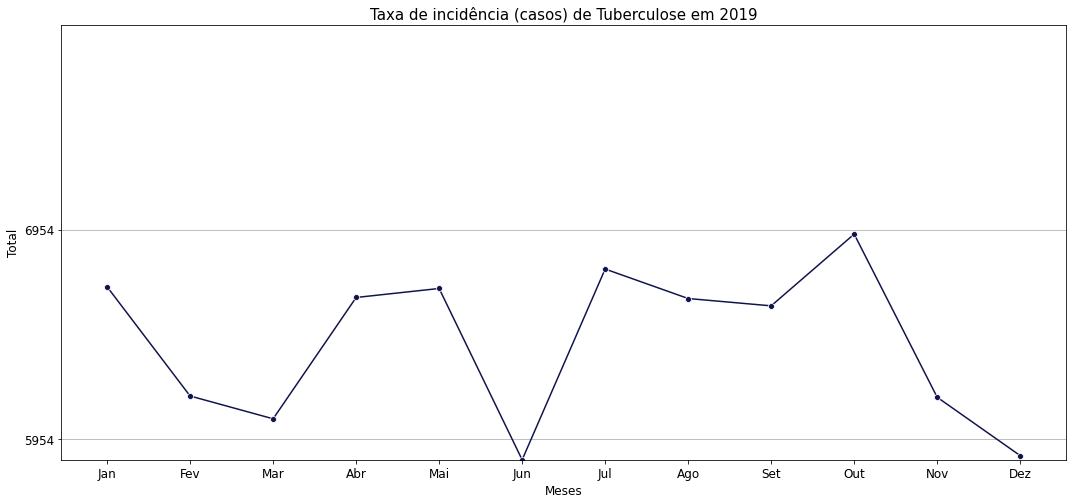

In [57]:
casos_novos_2019_meses = casos_novos_2019.loc[27:, 'Jan': 'Dez'].T.reset_index().rename(columns={'index': 'Meses', 27: 'Total'})
maximo = casos_novos_2019_meses['Total'].max()
minimo = casos_novos_2019_meses['Total'].min()

fig, ax = plt.subplots(figsize=(18, 8))
sns.lineplot(data=casos_novos_2019_meses, x='Meses', y='Total', color='#11144C', marker='o', ax=ax)

ax.set_title('Taxa de incidência (casos) de Tuberculose em 2019', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel( "Meses" , size = 12 ) 
ax.set_ylabel( "Total" , size = 12 ) 
ax.set(yticks=[i for i in range(minimo + 100, max(casos_novos_2019_meses['Total']) + 1000, 1000)])
ax.set(ylim=(minimo, maximo + 1000))

ax.yaxis.grid(True)

plt.show()

##### **Pergunta 9**


###### 9. Qual a letalidade média por ano da doença?

In [58]:
obitos_tuberculose.replace('-', 0, inplace=True)
converte_coluna_de_anos_em_inteiro(obitos_tuberculose)

ano_inicial = 2007
ano_final = 2020

nome_anos = []
media_anos = []

for i in range(14):
  nome_anos.append(str(ano_inicial + i))
  media_anos.append(obitos_tuberculose[str(ano_inicial + i)].astype(int).mean())


obitos_tuberculose_media = pd.DataFrame(list(zip(nome_anos, media_anos)), columns=['Anos', 'Média'])
obitos_tuberculose_media['Média'] = obitos_tuberculose_media['Média'].astype(int)

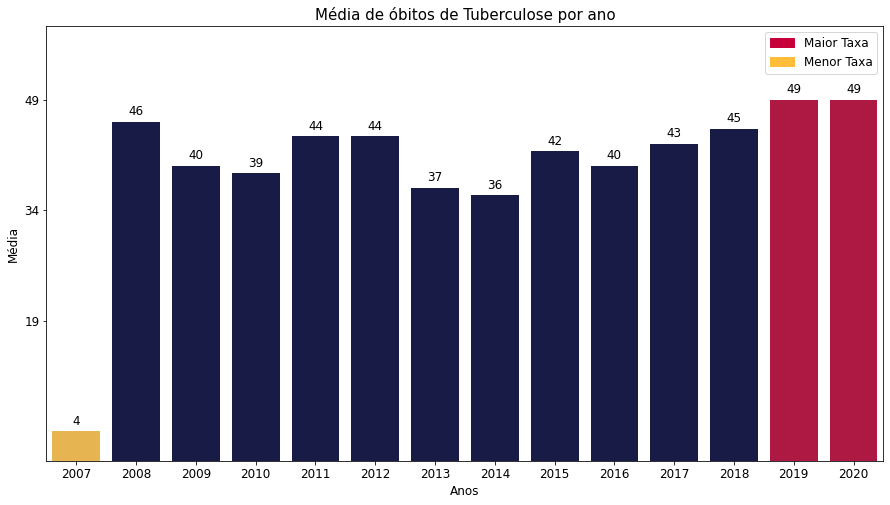

In [59]:
plota_grafico_destacando_maior_e_menor_valor(obitos_tuberculose_media, 'Média de óbitos de Tuberculose por ano', 'Anos', 'Média', 'Anos', 'Média', 15, 8, 'v', 0, 15, 10)

Segundo dados dos anos de 2007 a 2020 a letalidade média varia entre 4 a 49 mortes em média por ano.

##### **Pergunta 10**


###### 10. Qual estado brasileiro que mais apresenta casos e óbitos da doença durante os últimos anos?


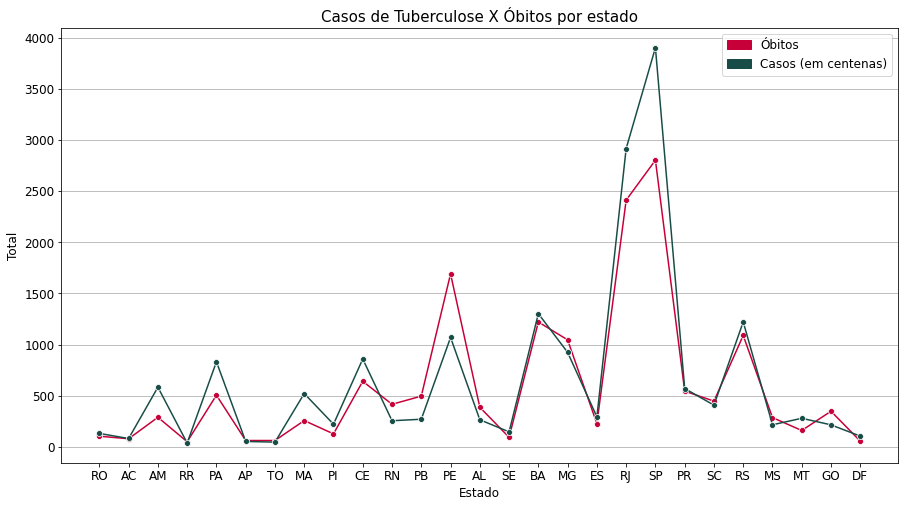

In [60]:
ax = sns.lineplot(x=obitos_tuberculose['Sigla'], y=obitos_tuberculose['Total'], color='#C70039', marker='o')
ax = sns.lineplot(x=casos_tuberculose[:27]['Sigla'], y=casos_tuberculose[:27]['Total']/100, color='#184D47', marker='o')
ax.set_title('Casos de Tuberculose X Óbitos por estado', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel( "Estado" , size = 12 ) 
ax.set_ylabel( "Total" , size = 12 )

cores_da_legenda = {
    'Óbitos':   '#C70039',
    'Casos (em centenas)':   '#184D47',
  }

patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in cores_da_legenda.items()]
plt.legend(handles=patches, fontsize=12)

ax.yaxis.grid(True)

plt.show()

Através do gráfico é possível perceber que o estado de São Paulo é o que mais possui casos e óbitos. Vale a pena ressaltar que São Paulo é um dos maiores estados do país.

##### **Pergunta 11**


###### 11. Existe uma relação entre as doses aplicadas das vacinas e as taxas de incidência e óbito?

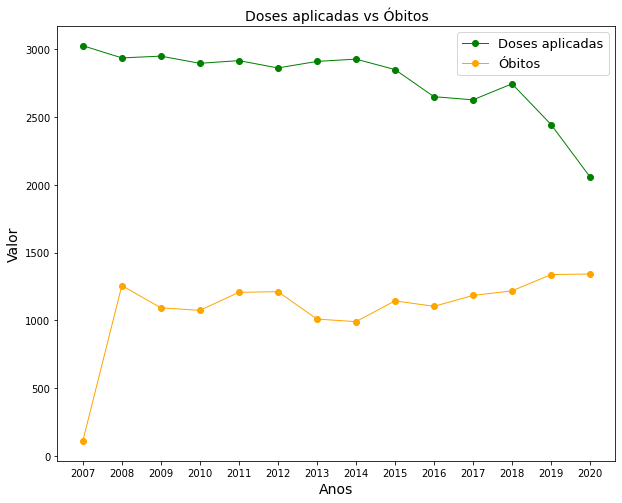

In [61]:
X = ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']

Y1 = cobertura_vacinal[X].sum().values
Y2 = obitos_tuberculose[X].sum().values
grafico_comparativo(X,Y1,Y2,"Doses aplicadas","Óbitos","Doses aplicadas vs Óbitos","Anos","Valor")

Podemos concluir que existe sim uma relação entre doses aplicadas, ou seja a cobertura vacinal, e o número de óbitos por tuberculose. Quando o número da cobertura começou a cair em 2015, conseguimos ver o aumento dos óbitos. A caída significativa de 2019 e 2020, mostraram um cenário o qual a vacinação de tuberculose ficou de lado.

##### **Pergunta 12**

###### 12. Existe uma relação entre a taxa de pobreza e a incidência de TB?


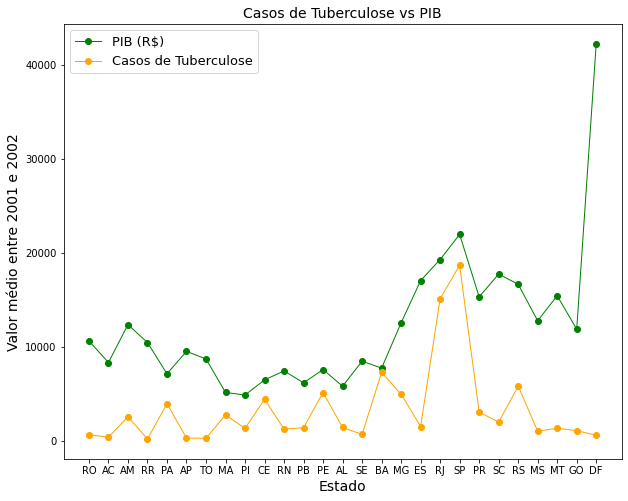

In [62]:
X = pib_percapta['Sigla']
anos = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']
Y1 = media_dos_anos_por_estado(pib_percapta,X,anos)
Y2 = media_dos_anos_por_estado(casos_tuberculose,X,anos)
grafico_comparativo(X,Y1,Y2,"PIB (R$)","Casos de Tuberculose","Casos de Tuberculose vs PIB","Estado","Valor médio entre " + anos[0] + " e " + anos[1])

A princípio, a relação obtida esperada era ter os estados com PIB alto terem  menores casos de tuberculose, por serem estados com uma economia melhor e com melhor qualidade no departamento de saúde. Porém podemos ver que existe uma variavél muito importante para se considerar... A população de cada estado como podemos ver na tabela abaixo:

In [63]:
estimativa_populacional["Total"] = estimativa_populacional.sum(axis=1)

In [64]:
X = estimativa_populacional['Sigla']
Y = estimativa_populacional['Total']

estimativa_populacional_estado = pd.DataFrame(list(zip(X, Y)), columns=['Sigla', 'Total'])
estimativa_populacional_estado.sort_values(by='Total', ascending=False, inplace=True)
estimativa_populacional_estado.reset_index(drop=True, inplace=True)

In [65]:
estimativa_populacional_estado

,Sigla,Total
0,SP,796202890
1,MG,377594197
2,RJ,303112146
3,BA,272616573
4,RS,207250685
5,PR,201863549
6,PE,167886340
7,CE,160737020
8,PA,143369406
9,MA,123052093


Observamos então que a maioria dos estados do Sudeste têm uma população bastante significativa em comparação com as outras regiõs do país. O Distrito Federal e Roraima, que tem poucos casos, seria por conta do número pequeno de pessoas vivendo nesses estados. 

##### **Pergunta 13** 

###### 13. Há alguma ligação entre o número de população privada de liberdade e o número de casos novos de TB?

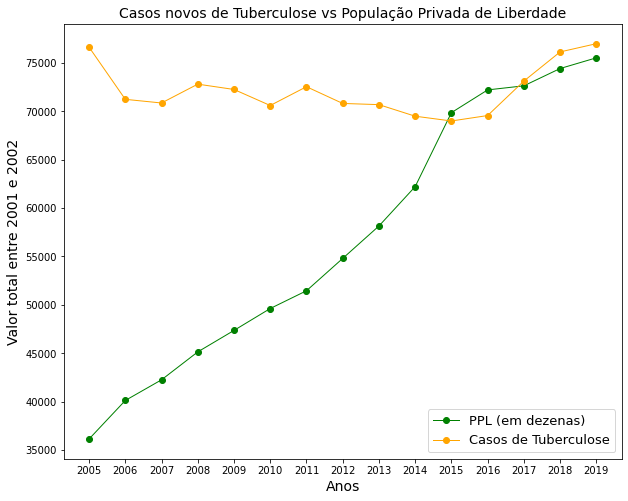

In [66]:
X = ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
Y1 =  [a / 10 for a in populacao_priv_lib[X].values[0]]
Y2 = casos_novos[casos_novos['Código do Estado'] == 'Total'][X].values[0]
grafico_comparativo(X,Y1,Y2,"PPL (em dezenas)","Casos de Tuberculose","Casos novos de Tuberculose vs População Privada de Liberdade","Anos","Valor total entre " + anos[0] + " e " + anos[1])

Existe sim uma relação na qual, a PPL é uma das populações vulneravéis que mais tem casos de TB. Uma avaçliação das populações vulneravéis é feita mais adiante.
Não podemos afirmar que o aumento em si de casos novos são por conta, na  maioria, da PPL. Para isso temos que analisar os casos novos vs os casos novos da PPL

In [67]:
ano_inicial = 2005
ano_final = 2019

nome_anos = []
soma_anos = []

for i in range(15):
  nome_anos.append(str(ano_inicial + i))
  soma_anos.append(casos_novos[str(ano_inicial + i)].sum())

casos_novos_periodo = pd.DataFrame(list(zip(nome_anos, soma_anos)), columns=['Anos', 'Total'])

In [68]:
ano_inicial = 2005
ano_final = 2019

nome_anos = []
soma_anos = []

for i in range(15):
  nome_anos.append(str(ano_inicial + i))
  soma_anos.append(casos_novos_ppl[str(ano_inicial + i)].sum())

casos_novos_ppl_periodo = pd.DataFrame(list(zip(nome_anos, soma_anos)), columns=['Anos', 'Total'])

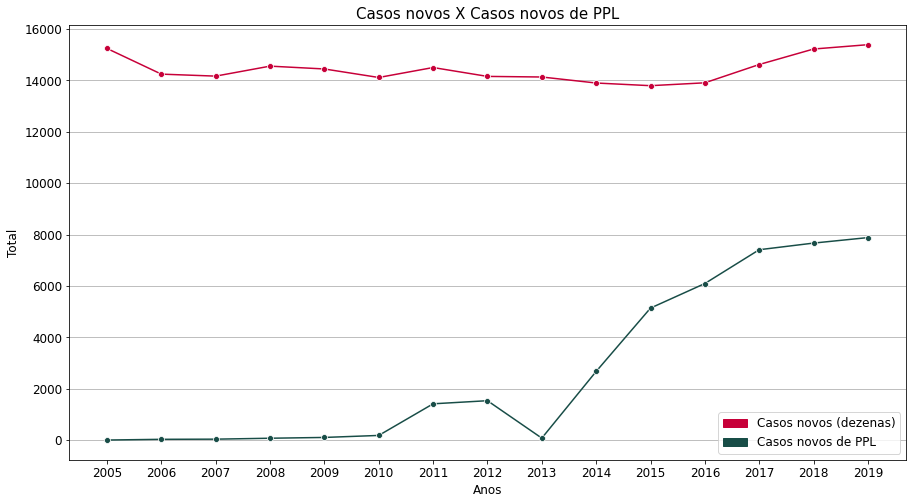

In [69]:
ax = sns.lineplot(x=casos_novos_periodo['Anos'], y=casos_novos_periodo['Total']/10, color='#C70039', marker='o')
ax = sns.lineplot(x=casos_novos_ppl_periodo['Anos'], y=casos_novos_ppl_periodo['Total'], color='#184D47', marker='o')
ax.set_title('Casos novos X Casos novos de PPL', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel( "Anos" , size = 12 ) 
ax.set_ylabel( "Total" , size = 12 )

cores_da_legenda = {
    'Casos novos (dezenas)':   '#C70039',
    'Casos novos de PPL':   '#184D47',
  }

patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in cores_da_legenda.items()]
plt.legend(handles=patches, fontsize=12)

ax.yaxis.grid(True)

plt.show()

A PPL teve pouca influência no aumento significativo de casos novos em geral.

##### **Pergunta 14**

###### 14. Existe uma relação entre a taxa de incidência de AIDS com a população privada de liberdade (PPL)?

In [70]:
ano_inicial = 2005
ano_final = 2019

nome_anos = []
soma_anos = []

for i in range(15):
  nome_anos.append(str(ano_inicial + i))
  soma_anos.append(casos_aids[str(ano_inicial + i)].sum())

casos_aids_periodo = pd.DataFrame(list(zip(nome_anos, soma_anos)), columns=['Anos', 'Total'])

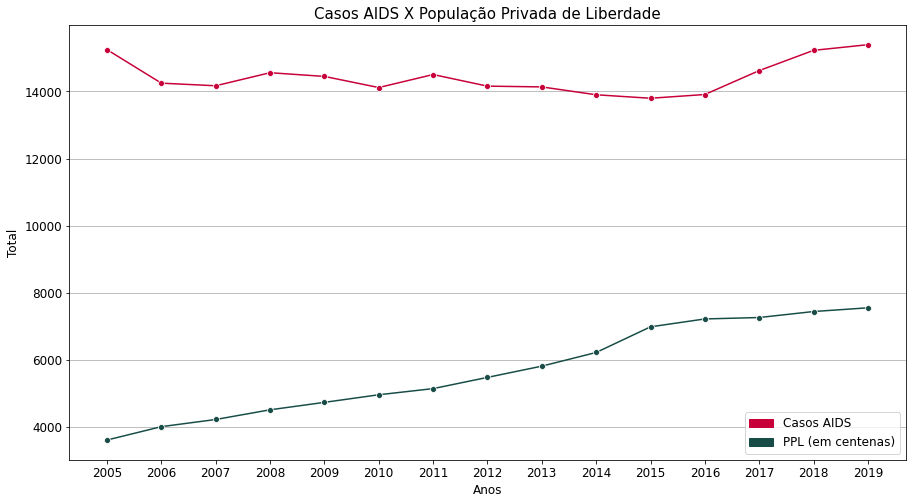

In [71]:
ax = sns.lineplot(x=casos_novos_periodo['Anos'], y=casos_novos_periodo['Total']/10, color='#C70039', marker='o')
ax = sns.lineplot(x=ppl['Anos'], y=ppl['Total']/100, color='#184D47', marker='o')
ax.set_title('Casos AIDS X População Privada de Liberdade', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel( "Anos" , size = 12 ) 
ax.set_ylabel( "Total" , size = 12 )

cores_da_legenda = {
    'Casos AIDS':   '#C70039',
    'PPL (em centenas)':   '#184D47',
  }

patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in cores_da_legenda.items()]
plt.legend(handles=patches, fontsize=12)

ax.yaxis.grid(True)

plt.show()

O número da PPL, sem considerar em centenas, é bem maior do que os casos de AIDS no país, porém é possível observar que as duas instâncias podem caminhar lado a lado. 

##### **Pergunta 15**

###### Existe a Tuberculose Drogarresistente, como está a taxa dela durante os anos?


In [72]:
ano_inicial = 2005
ano_final = 2020

nome_anos = []
soma_anos = []

for i in range(15):
  nome_anos.append(str(ano_inicial + i))
  soma_anos.append(casos_novos_dr[str(ano_inicial + i)].sum())

casos_novos_dr_periodo = pd.DataFrame(list(zip(nome_anos, soma_anos)), columns=['Anos', 'Total'])

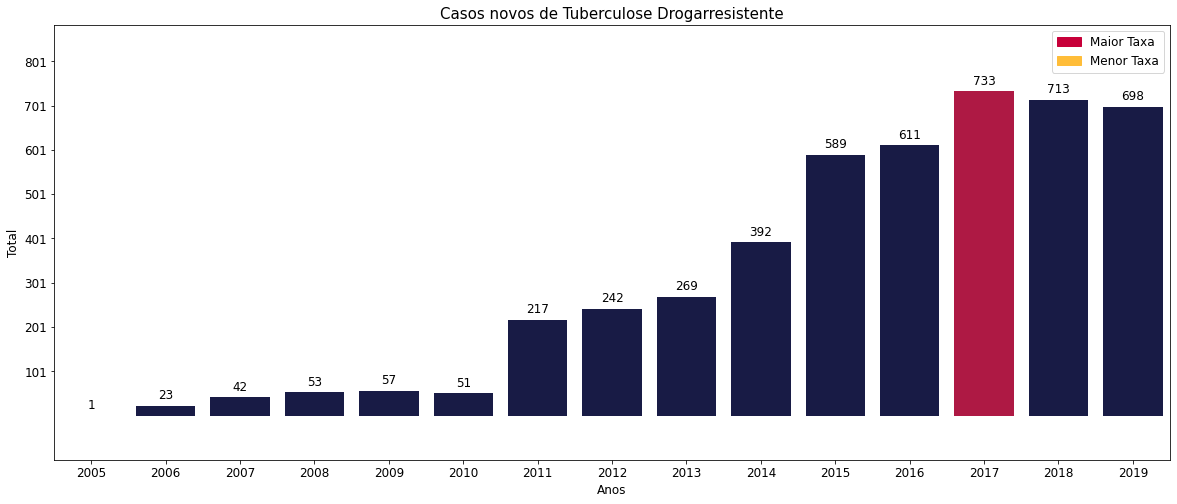

In [73]:
plota_grafico_destacando_maior_e_menor_valor(casos_novos_dr_periodo, 'Casos novos de Tuberculose Drogarresistente', 'Anos', 'Total', 'Anos', 'Total', 20, 8, 'v', casos_novos_dr_periodo['Total'].min() - 100, 100, 150 )

De um período de 2015 até o último ano, o número de casos novos
TB drogarresistente aumentaram. TB drogarresistente inclui: resistência à isoniazida, resistência à rifampicina, resistência à isoniazida e rifampicina juntas e resistência à drogas de primeira linha.



##### **Pergunta 16**

###### 16. Houve muitos casos de cura da doença?

In [74]:
ano_inicial = 2001
ano_final = 2020

nome_anos = []
soma_anos = []

for i in range(20):
  nome_anos.append(str(ano_inicial + i))
  soma_anos.append(casos_novos_cura[str(ano_inicial + i)].sum())

casos_novos_cura_periodo = pd.DataFrame(list(zip(nome_anos, soma_anos)), columns=['Anos', 'Total'])

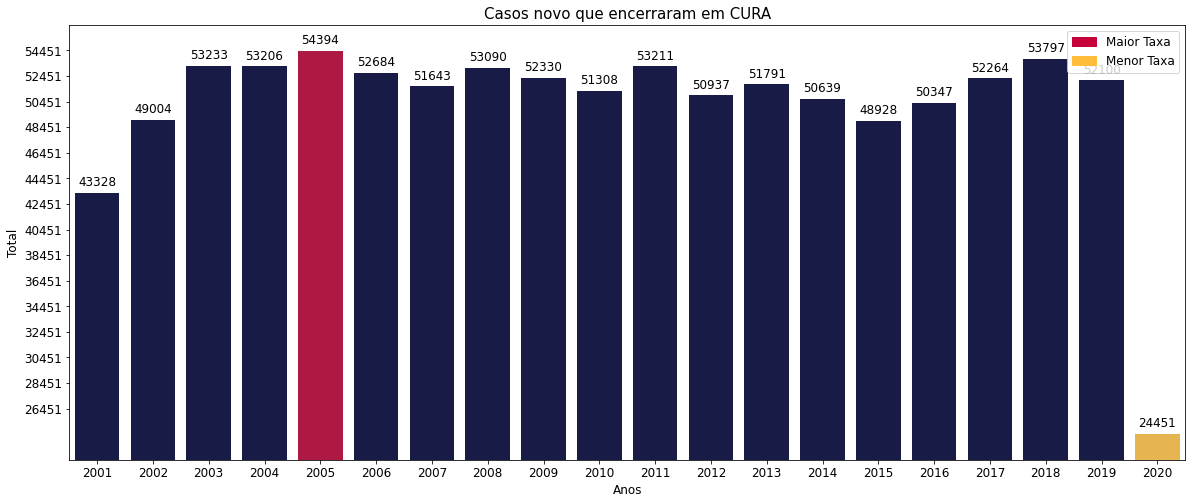

In [75]:
plota_grafico_destacando_maior_e_menor_valor(casos_novos_cura_periodo, 'Casos novo que encerraram em CURA', 'Anos', 'Total', 'Anos', 'Total', 20, 8, 'v', casos_novos_cura_periodo['Total'].min() - 2000, 2000, 2050 )

In [76]:
ano_inicial = 2001
ano_final = 2020

nome_anos = []
soma_anos = []

for i in range(20):
  nome_anos.append(str(ano_inicial + i))
  soma_anos.append(casos_novos_abandono[str(ano_inicial + i)].sum())

casos_novos_abandono_periodo = pd.DataFrame(list(zip(nome_anos, soma_anos)), columns=['Anos', 'Total'])

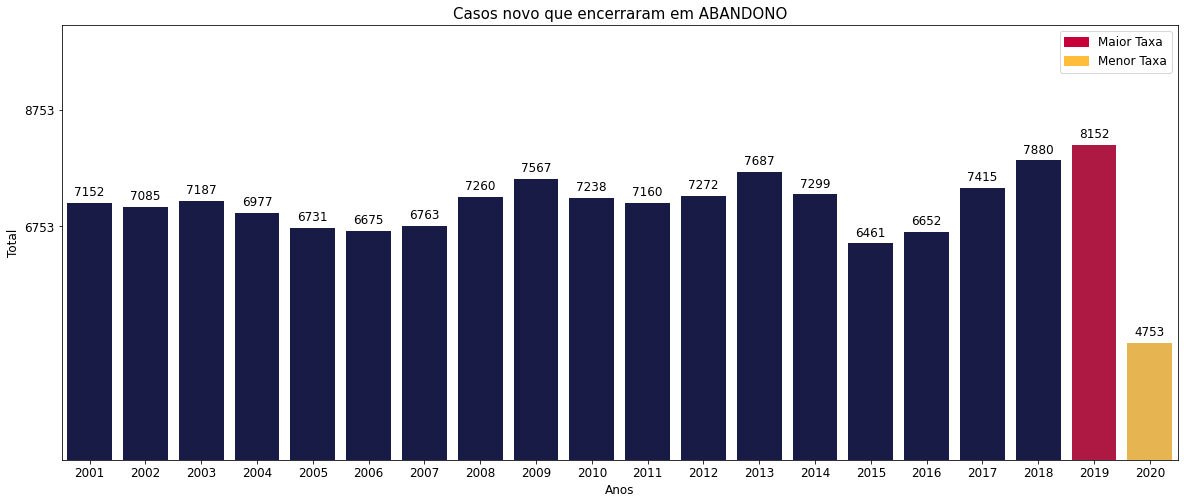

In [77]:
plota_grafico_destacando_maior_e_menor_valor(casos_novos_abandono_periodo, 'Casos novo que encerraram em ABANDONO', 'Anos', 'Total', 'Anos', 'Total', 20, 8, 'v', casos_novos_abandono_periodo['Total'].min() - 2000, 2000, 2050 )

Há uma preocupação grande em notar que houve um aumento no abandono de tratamento no ano ano 2019. A menor taxa foi a do ano 2020 mas há várias razões possíveis, a mais provavél é a falta de infraestrutura que impediu doenças como TB fossem tratadas e sendo assim nãoter como constatar se alguém abandonou o tratamento ou não.

##### **Pergunta 17**

###### 17. Como é a relação das populações vulnerávies com a doença?

Para melhor análise, vamos considerr somente os anos de 2016 até 2020.

In [78]:
casos_novos_polvul

,População Privada de Liberdade,Profissionais de Saúde,População de Rua,Imigrantes
Anos,,,,
2016,6094,873,1382,346
2017,7410,840,1585,363
2018,7668,966,1660,420
2019,7882,953,1755,438
2020,6663,1084,1654,392


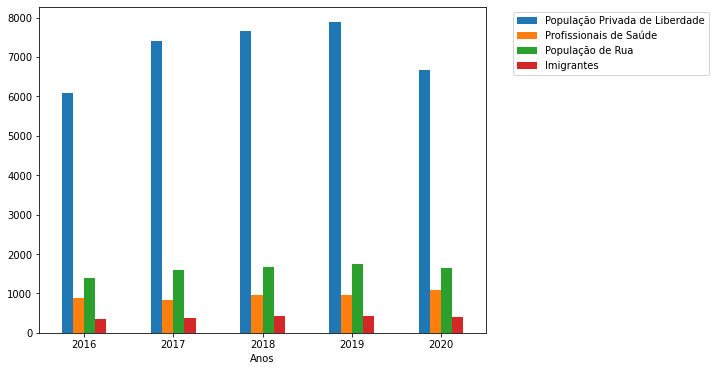

In [79]:
casos_novos_polvul.plot.bar(figsize=(8, 6))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

No período mostrado, observou-se um aumento
na ocorrência da doença nas populações mais vulneráveis
ao adoecimento. A maior variação de casos nesse período foi da PPL (populção privada de liberdade). O número de casos novos pela PPL diminiu do ano 2019 para o ano de 2020 por conta da pandemia e a parada de muitos serviços no país.

##### **Pergunta 18**

###### 18. Há alguma relação que raças diferentes com o número de casos novos de tuberculose?

Para melhor análise, vamos considerr somente os anos de 2016 até 2020. Na maioria das análises feitas pelo orgão público, é ordenando no mesmo grupo as raças: preto e pardo, indigena e amarelo.

In [80]:
casos_novos_racas

,Preta/parda,Amarela/indígena,Branca
Anos,,,
2016,40913,1160,813
2017,43898,1194,759
2018,46453,1227,770
2019,47279,1381,786
2020,41702,1310,644


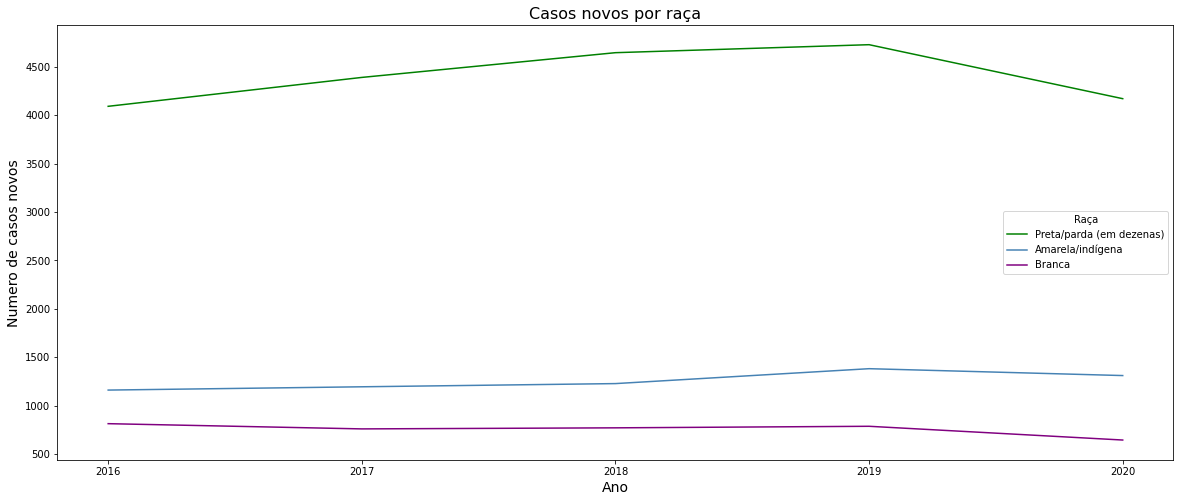

In [81]:
plt.plot(casos_novos_racas['Preta/parda']/10, label='Preta/parda (em dezenas)', color='green')
plt.plot(casos_novos_racas['Amarela/indígena'], label='Amarela/indígena', color='steelblue')
plt.plot(casos_novos_racas['Branca'], label='Branca', color='purple')

plt.legend(title='Raça')

plt.ylabel('Numero de casos novos', fontsize=14)
plt.xlabel('Ano', fontsize=14)
plt.title('Casos novos por raça', fontsize=16)

plt.show()

É discrepante a diferença entre a situação das pessoas de raça branca das minorias do país. A relação entre as raças de minoria e situação econômica já foram provados antes mas é interresante entener que esse gráfico mostra que a maioria em situação precária, ou seja as minorias, certamente tem mais contato com a doença.

##### **Pergunta 19**

###### 19. A confirmação por laboratorio da doença diminiu ou aumentou?

In [82]:
ano_inicial = 2001
ano_final = 2020

nome_anos = []
soma_anos = []

for i in range(20):
  nome_anos.append(str(ano_inicial + i))
  soma_anos.append(casosnovos_confir_labo[str(ano_inicial + i)].sum())

casosnovos_confir_labo_periodo = pd.DataFrame(list(zip(nome_anos, soma_anos)), columns=['Anos', 'Total'])

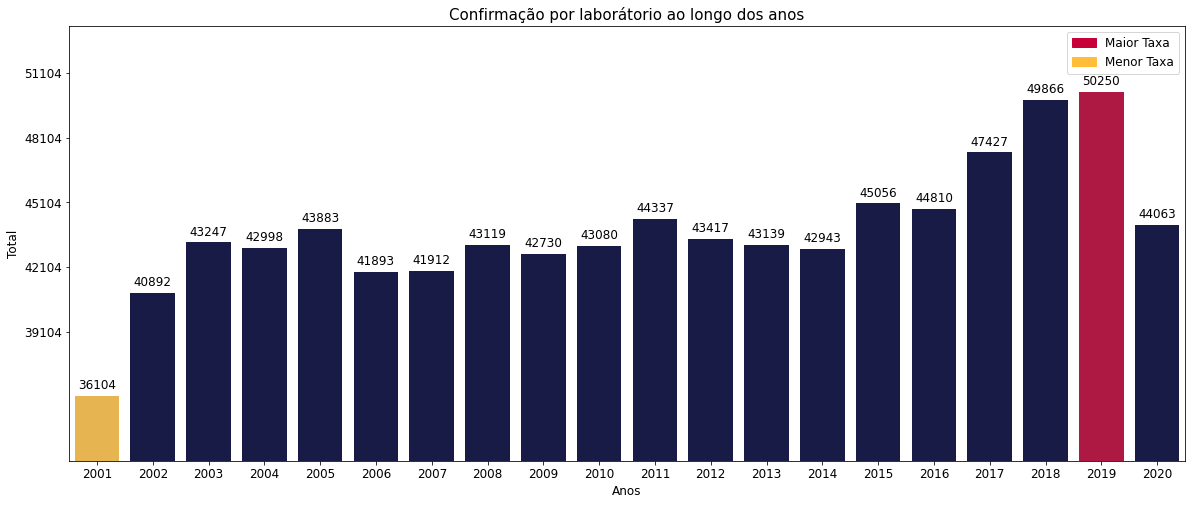

In [83]:
plota_grafico_destacando_maior_e_menor_valor(casosnovos_confir_labo_periodo, 'Confirmação por laborátorio ao longo dos anos', 'Anos', 'Total', 'Anos', 'Total', 20, 8, 'v', casosnovos_confir_labo_periodo['Total'].min() - 3000, 3000, 3050 )

Uma estatística observada importante é a confrimação por laborátorio, que aumentou durante os anos. Casos novos confirmados por critério laboratorial significa que há menos um resultado positivo nos exames: de baciloscopia de escarro, teste rápido molecular para tuberculose (TRM-TB) ou cultura.

Em 2020, o número teve uma queda significante porém lembrando do cenário de 2020 podemos fazer especulações, as quais sendo que a infraesturura do setor de saúde estava esgotada.

##### **Pergunta 20**

###### O que se pode concluir com as análises feitas?

O presente trabalho foi estruturado para analisar os períodos de Tuberculose, em particular incluimos um cenário atípico, ou seja, a pandemia que começou no ano 2020.

Os dados apresentados no último ano demonstram um comportamento diferente em relação ao que foi observado durante um bom tempo da doença, com uma queda acentuada da incidência e uma piora de indicadores como o de aumento do abandono.

Não é possível dizer se a pandemia influenciou em algum aspecto da doença, na sua gravidade. É incerto também concluir com 100% de certeza se os indicadores pioraram por conta de aspectos externos como a sobrecarga de hospitais e centros de saúde. Isso potencialmente pode trazer uma qualidade não tão satisfatória dos dados. 

Na presente data (10/10/2021) a pandemia não acabou, mesmo com as vacinas ainda existe um descontrole em certos países como também a chegada de variantes. Esse trabalho está no começo da demonstração do comportamento da TB na pandemia. Podendo ser útil para análise comparativa entre os anos antes da pandemia e pós-pandemia.